# Oliver's comments on notebook (to be removed before publication!)

Overall the exercise is very good exploring an interesting approach. But it introduces new material at a break neck speed. Also there is nothing for the apprentice to **DO** other than read. 

I am confused as to the example presented - the dictionary does not seem to agree with picture?

## suggestions

* That learning objectives are added. What is the apprentice meant to get from the is exercise.
* That topics are introduced one by one (see next points) with a concrete example provided 
   for each in cells that are run. Each topic should have a student mini exercise where they put into practice   
   what  they have been shown. One or two of these student exercises should have an associated 'essay' question   
   in the TW3 quiz.
* Maybe prepare a notebook with the student examples filled in an only finally clear them (so the answer is    
  available in git?
   
* I would suggest that the topics are presented:
  1. PriorityQueues. Do you want to use your `class priority_queue` an alternative would be  be better to use    
     inbuilt Python `PriorityQueue` https://docs.python.org/3/library/queue.html#queue.PriorityQueue ? Maybe 
     your graph application needs the special handling where you discard duplicates? The Concrete example could   
     be:

In [1]:
# run this cell to show how to store and retrieve items in a PriorityQueue
from queue import PriorityQueue

def manual_test_priority_queue():
    print('manual test:')
    pq = PriorityQueue()
    pq.put((5, 'write code'))
    pq.put((7, 'release product'))
    pq.put((1, 'write spec'))
    pq.put((3, 'create tests'))
    pq.put((3, 'duplicate level 3 thingy'))
    while not pq.empty():
        print(pq.get())


manual_test_priority_queue()

manual test:
(1, 'write spec')
(3, 'create tests')
(3, 'duplicate level 3 thingy')
(5, 'write code')
(7, 'release product')


* ...suggested topics continued
    2. Explain how graphs can be stored in PriorityQueue.
    3. Draw a graph using networkx. Provide the example. Could this be more concrete than i, j, k, l, m? But get       them to produce there own picture an use this for an essay question in the quiz.
    4. Finally turn to Dijkstra's Algorithm. Could you use the grokking example to link with the other notebook? 

## code style

The apprentices have been taught coding compliant to PEP8 and so your `class priority_queue`  would confuse them
1.	The class name `priority_queue` is not camel case it should be `PriorityQueue`. (There is an in built Python     `PriorityQueue` class in 
2.	The methods have a first argument `heap`. PEP8 says “Always use self for the first argument for instance methods”. This is  
3. There are no docstrings providing explanations. Below I have added placeholders and `# TODO`. 
4.	The apprentices have been shown to create empty lists with [] and dictionaries with {} (this is not a PEP8 issue). 
5. To check for PEP8 issues and codestyle the best toolis `pylint` on the command line. Although there is an online server https://pythonbuddy.com/# this is limited.
6. Further down you use a variable name `D`. Non-PEP8 variable names need to be choosen for readability.


Please find a cleaned up version of the class below - with an initial instruction comment for the apprentices on the cell

In [2]:
# instruction run this cell to define the PriorityQueue class
from heapq import heapify, heappop, heappush


class PriorityQueue():
    """ class docstring """ # TODO
    def __init__(self):
        self.queue = []
        heapify(self.queue)
        self.index = {}

    def push(self, priority, item):
        """method docstring """  # TODO
        if item in self.index:
            # item already stored - remove it before adding
            self.queue = [(p, i) for p, i in self.queue if i != item]
            heapify(self.queue)
        heappush(self.queue, (priority, item))
        self.index[item] = priority

    def pop(self):
        """method docstring """  # TODO
        if self.queue:
            popped = heappop(self.queue)
            return popped
        return None

    def __contains__(self, label):
        return label in self.index

    def __len__(self):
        return len(self.queue)


**end of Oliver's comments on notebook (to be removed before publication!)**

# Using a Priority Queue for Dijkstra's Algorithm

A priority queue can be implemented using a heap. This can then be used to control the search for the shortest route through a weighted directed graph.
Networkx and matplotlib are needed only for making the diagram of the graph. The % line is the 'magic' for including matplotlib figures.

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

Here is the heap for priority queue.

In [4]:
from heapq import heapify, heappop, heappush

class priority_queue():
    def __init__(heap):
        heap.queue = list()
        heapify(heap.queue)
        heap.index = dict()
    def push(heap, priority, label):
        if label in heap.index:
            heap.queue = [(a,b) 
                          for a,b in heap.queue if b!=label]
            heapify(heap.queue)
        heappush(heap.queue, (priority, label))
        heap.index[label] = priority 
    def pop(heap):
        if heap.queue:
            return heappop(heap.queue)
    def __contains__(heap, label):
        return label in heap.index
    def __len__(heap):
        return len(heap.queue)

Here is a graph for testing the algorithm expressed as as dictionary entries.

In [5]:
graph = {'i': {'j':5, 'k':6},
         'j': {'k':5, 'l':5},
         'k': {'l':6, 'm':5},
         'l': {'n':6},
         'm': {'l':4,'n':4},
         'n': {}}

For matplotlib, here is a copy of the graph made in Networkx. As there are directions to the edges a DiGraph is used. The weights are also added as the edges are created from the graph dictionary.

In [6]:
D = nx.DiGraph()
for node in graph:
    D.add_nodes_from(node)
    for edge, weight in graph[node].items():
        D.add_edge(node,edge, weight=weight)

In [7]:
print(D.nodes)

['i', 'j', 'k', 'l', 'm', 'n']


In [8]:
print(D.edges)

[('i', 'j'), ('i', 'k'), ('j', 'k'), ('j', 'l'), ('k', 'l'), ('k', 'm'), ('l', 'n'), ('m', 'l'), ('m', 'n')]


Here is the Networkx diagram of the graph. Although it is not topologically sorted. 

Other layouts are available instead of circular including 'random' and 'spring' (which lets the vertices cluster as if the edgea were under tension like small springs).

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


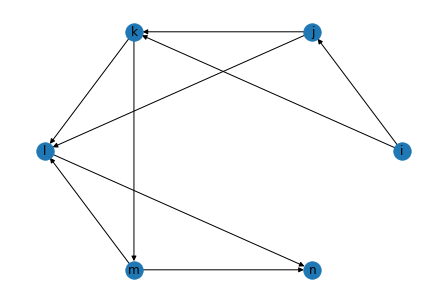

In [9]:
nx.draw(D, pos=nx.circular_layout(D), with_labels=True)
plt.show()

The priority queue can be used to control a search of a graph using Dijkstra's algorithm.

In [10]:
def dijkstra(graph, source, finish):
    inf = float('inf')
    known = set()
    #priority = priority_queue()
    priority = PriorityQueue()
    path = {source: source}

    for vertex in graph:
        if vertex == source:
            priority.push(0, vertex)
        else:
            priority.push(inf, vertex)

    last = source    
    while last != finish:
        (weight, current_node) = priority.pop()
        if current_node not in known:
            for next_node in graph[current_node]:
                upto_current = priority.index[current_node]
                upto_next = priority.index[next_node]
                to_next = upto_current + \
                graph[current_node][next_node]
                if to_next < upto_next:
                    priority.push(to_next, next_node)
                    print("updating shortest from %s to %s" 
                          % (current_node, next_node))
                    print ("total distance: %i" 
                           % to_next)
                    path[next_node] = current_node
                    
            last = current_node
            known.add(current_node)
    
    return priority.index, path

Here is the dijkstra search applied to the graph defined earlier. 

The source is *i* and the finish is *n* - as can be seen in the Networkx copy based on the out-degree and in-degree values for these vertices. 

When a new 'shortcut' is discovered in the run then the shortest path is updated. 

In [11]:
dist, path = dijkstra(graph, 'i', 'n')

updating shortest from i to j
total distance: 5
updating shortest from i to k
total distance: 6
updating shortest from j to l
total distance: 10
updating shortest from k to m
total distance: 11
updating shortest from l to n
total distance: 16
updating shortest from m to n
total distance: 15
